## RFM Analysis

**RFM Analysis Overview:**

- RFM stands for Recency, Frequency, and Monetary.
- RFM Analysis is a technique used for customer segmentation.
- It involves grouping customers based on their purchasing habits and allows for the development of tailored strategies for each group.
- RFM provides various data-driven actions for CRM efforts.

**RFM Metrics:**

1. **Recency (R):** Indicates how recently a customer made a purchase. For example, if we have two customers with Recency values of 1 and 10, the one with a Recency value of 1 is more valuable as they made a purchase just one day ago (on a daily basis).

2. **Frequency (F):** Represents the total number of purchases/transactions a customer has made.

3. **Monetary (M):** Reflects the monetary value that customers have contributed to the business.

---
**RFM Scoring:**

- To standardize the RFM metrics, they are transformed into scores ranging from 1 to 5, from the smallest (least recent, least frequent, or least monetary) to the largest. However, for Recency, the score is assigned inversely; the smallest Recency gets the highest score.

- An RFM score is represented by writing the R, F, and M scores together. For example, if a customer has an R score of 5, F score of 4, and M score of 2, their RFM score would be written as - 542.

- When segmenting customers, it is often more important for the customer to interact with the site and make a purchase rather than their monetary value. The frequency and recency of their interactions are often of greater significance. Hence, segmenting based on two dimensions (R-F) can be a valuable approach.

- Once customer segmentation is complete, departments can begin their campaign operations tailored to these segments.

## Business Problem

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

Source: [https://archive.ics.uci.edu/dataset/502/online+retail+ii](https://archive.ics.uci.edu/dataset/502/online+retail+ii)

In [1]:
import requests
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [2]:
data_zip = requests.get(
    "https://archive.ics.uci.edu/static/public/502/online+retail+ii.zip"
)
data_unzipped = ZipFile(BytesIO(data_zip.content))
zip_namelist = data_unzipped.namelist()[0]
df = pd.read_excel(BytesIO(data_unzipped.read(zip_namelist)))

### Eploratory Data Analysis (EDA)

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [5]:
df.shape

(525461, 8)

In [6]:
df.describe(include=["int", "float", "object"])

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
count,525461.0,525461,522533,525461.000000,525461.000000,417534.000000,525461
unique,28816.0,4632,4681,NaN,NaN,NaN,40
top,537434.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,United Kingdom
freq,675.0,3516,3549,NaN,NaN,NaN,485852
mean,NaN,NaN,NaN,10.337667,4.688834,15360.645478,NaN
std,NaN,NaN,NaN,107.424110,146.126914,1680.811316,NaN
min,NaN,NaN,NaN,-9600.000000,-53594.360000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,1.250000,13983.000000,NaN
50%,NaN,NaN,NaN,3.000000,2.100000,15311.000000,NaN
75%,NaN,NaN,NaN,10.000000,4.210000,16799.000000,NaN


#### Features

1. **InvoiceNo:** Invoice number, a unique number assigned to each transaction or invoice. If it starts with 'C,' it indicates a canceled transaction.
2. **StockCode:** Product code, a unique number for each product.
3. **Description:** Product name.
4. **Quantity:** Quantity of products, indicating how many of the products on the invoices were sold.
5. **InvoiceDate:** Invoice date and time.
6. **UnitPrice:** Product price (in pounds).
7. **CustomerID:** Unique customer number.
8. **Country:** Name of the country where the customer resides.

#### Comment:
- Invoice: There can be multiple identical values for invoices because it represents the invoice number. Multiple similar lines are normal because a single order can contain multiple products.
- Quantity: It indicates the quantity of items sold.
- Price: It provides the selling price of a product.
- Therefore, when calculating the total revenue from an invoice, you need to perform the **`"Quantity * Price"`** operation for all the lines associated with that invoice and sum them up.

In [7]:
# check how many missing in the dataset and in each variable

df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [8]:
# How many unique product does the dataset contain?

print("Number of unique product: ", df.Description.nunique())

Number of unique product:  4681


In [9]:
df.Description.value_counts().head(10)

Description
WHITE HANGING HEART T-LIGHT HOLDER    3549
REGENCY CAKESTAND 3 TIER              2212
STRAWBERRY CERAMIC TRINKET BOX        1843
PACK OF 72 RETRO SPOT CAKE CASES      1466
ASSORTED COLOUR BIRD ORNAMENT         1457
60 TEATIME FAIRY CAKE CASES           1400
HOME BUILDING BLOCK WORD              1386
JUMBO BAG RED RETROSPOT               1310
LUNCH BAG RED SPOTTY                  1274
REX CASH+CARRY JUMBO SHOPPER          1232
Name: count, dtype: int64

In [10]:
# The number of unique product sold

(
    df.groupby("Description")
    .agg(Quantity=pd.NamedAgg(column="Quantity", aggfunc="sum"))
    .sort_values("Quantity", ascending=False)
)

,Quantity
Description,
WHITE HANGING HEART T-LIGHT HOLDER,57733
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54698
BROCADE RING PURSE,47647
PACK OF 72 RETRO SPOT CAKE CASES,46106
ASSORTED COLOUR BIRD ORNAMENT,44925
...,...
Zebra invcing error,-9000
ebay sales,-13630
missing,-15149


In [11]:
# Number of unique transaction

print("Number of unique transactions: ", df.Invoice.nunique())

Number of unique transactions:  28816


In [12]:
df["TotalPrice"] = df.Quantity * df.Price

In [13]:
df.groupby("Invoice").agg(TotalPrice=pd.NamedAgg(column="TotalPrice", aggfunc="sum"))

,TotalPrice
Invoice,
489434,505.30
489435,145.80
489436,630.33
489437,310.75
489438,2286.24
...,...
C538121,-12.75
C538122,-1.25
C538123,-7.50


#### Observations:

1. The data shape is (525461,8), meaning that if the variable count is less than 525,461, there are missing values in the variables.

    - `Description` & `Customer ID` have missing values
    
    
2. `Quantity` & `Price` contain negative values, where it should not happen. We need to drill deeper to see why.
    

In [14]:
# Observation 1: See what can we observe by seeing Description is null

(df.loc[df.Description.isna()]).shape

(2928, 9)

In [15]:
# Observation 1: See what can we observe by seeing Customer ID is null

(df.loc[df['Customer ID'].isna()]).shape

(107927, 9)

In [16]:
df_new = (df.loc[~((df.Quantity.isna()) | (df['Customer ID'].isna())) ])
df_new.shape

(417534, 9)

**Action to Observation 1:**

As `Customer ID` & `Description` are the necessary variables to let us identify every individual customer and product, plus there are no supplementary information to impute these two variables. We are going to discard them.

All the missing values in `Description` & `Customer ID` added up is 107,927 out of 525,461, it is about 20.54%.
After taking them out, there will be remaining 417,534 data.

In [17]:
# Observation 2: See what can we observe by seeing PRICE is less than 0

print("Before action 1: ", (df.loc[df.Price<0]).shape)
print("After action 1: ", (df_new.loc[df.Price<0]).shape)

(df.loc[df.Price<0]).shape

Before action 1:  (3, 9)
After action 1:  (0, 9)


(3, 9)

In [18]:
# Observation 2: See what can we observe by seeing Quantity is less than 0

print("Before action 1: ", (df.loc[df.Quantity<0]).shape)
print("After action 1: ", (df_new.loc[df.Quantity<0]).shape)

(df.loc[df.Quantity<0]).shape

Before action 1:  (12326, 9)
After action 1:  (9839, 9)


(12326, 9)

In [19]:
print("Before action 1: ", (df.loc[(df.Quantity<0) | (df.Price<0) ]).shape)
print("Before action 1: ", (df_new.loc[(df.Quantity<0) | (df.Price<0) ]).shape)

Before action 1:  (12329, 9)
Before action 1:  (9839, 9)


In [20]:
df = df_new.loc[~((df.Quantity<0) | (df.Price<0))]
df.shape

(407695, 9)

In [21]:
df.Invoice.astype(str).str.contains("C", regex=True).sum()

0

**Action to Observation 2:**

Observed a pattern among the data from negative values `Quantity` & `Price`, the `Invoice` is always associated with a "C" at the first letter. Removing negative values from `Quantity` & `Price` is equivalent to removing all "C" contained (invalid) from `Invoice`.

Before taking action 1, among 525,461 data, 12,329 data only take 2.35%. It should not make big impact to the final result.
After taking action 1, among 417,534 data, 9,839 data are affectet. It takes about 2.36% to the whole dataset.

After taking them out, there will be remaining 407,695 data.

### Data Preparation

In [22]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
count,407695.000000,407695,407695.000000,407695.000000,407695.000000
mean,13.586686,2010-07-01 10:10:10.782177792,3.294188,15368.504107,21.663261
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000,0.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,13997.000000,4.950000
50%,5.000000,2010-07-09 15:46:00,1.950000,15321.000000,11.900000
75%,12.000000,2010-10-14 17:09:00,3.750000,16812.000000,19.500000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000,15818.400000
std,96.842229,NaN,34.756655,1679.795700,77.147356


In [23]:
df.describe(include=["int", "float", "object"])

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,TotalPrice
count,407695.0,407695,407695,407695.000000,407695.000000,407695.000000,407695,407695.000000
unique,19215.0,4017,4444,NaN,NaN,NaN,37,NaN
top,500356.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,United Kingdom,NaN
freq,270.0,3153,3153,NaN,NaN,NaN,370951,NaN
mean,NaN,NaN,NaN,13.586686,3.294188,15368.504107,NaN,21.663261
std,NaN,NaN,NaN,96.842229,34.756655,1679.795700,NaN,77.147356
min,NaN,NaN,NaN,1.000000,0.000000,12346.000000,NaN,0.000000
25%,NaN,NaN,NaN,2.000000,1.250000,13997.000000,NaN,4.950000
50%,NaN,NaN,NaN,5.000000,1.950000,15321.000000,NaN,11.900000
75%,NaN,NaN,NaN,12.000000,3.750000,16812.000000,NaN,19.500000


### Calculate RFM Metrics

**Recency:** Represents the recency of the customer. (Analysis Date - Date of the customer's last purchase)

**Frequency:** Total purchase value made by the customer.

**Monetary:** The total amount left by the customer as a result of total purchases.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407695 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  object        
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  float64       
 7   Country      407695 non-null  object        
 8   TotalPrice   407695 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.1+ MB


In [25]:
df.InvoiceDate.max()

Timestamp('2010-12-09 20:01:00')

In [26]:
today_date = df.InvoiceDate.max() + pd.Timedelta(days=2)

In [27]:
# The minimum value of Monetary is 0, which is not a desire value because spending $0 is meaningless
# and later will take log. To avoid infinity, we need to take out $0.

df = df.loc[df.TotalPrice > 0]

In [28]:
df_RFM = df.groupby("Customer ID", as_index=False).agg(Recency = pd.NamedAgg(column="InvoiceDate", aggfunc=lambda x: (today_date - x.max()).days), 
                                                       Frequency = pd.NamedAgg(column="Invoice", aggfunc="nunique"),
                                                       Monetary = pd.NamedAgg(column="TotalPrice", aggfunc="sum"),
                                                       log_Monetary = pd.NamedAgg(column="TotalPrice", aggfunc= lambda x: np.sum(np.log(x))))


In [29]:
df_RFM.head()

,Customer ID,Recency,Frequency,Monetary,log_Monetary
0,12346.0,166,11,372.86,72.171297
1,12347.0,4,2,1323.32,200.448605
2,12348.0,75,1,222.16,45.515422
3,12349.0,44,3,2671.14,305.479026
4,12351.0,12,1,300.93,55.153031


In [30]:
df_RFM.describe()

,Customer ID,Recency,Frequency,Monetary,log_Monetary
count,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000
mean,15349.290353,92.171846,4.455705,2048.238236,218.477940
std,1701.200176,96.860633,8.170213,8914.481280,474.810383
min,12346.000000,2.000000,1.000000,2.950000,1.081805
25%,13882.500000,19.000000,1.000000,307.987500,45.974447
50%,15350.500000,54.000000,2.000000,706.020000,103.107424
75%,16834.250000,137.000000,5.000000,1723.142500,239.694884
max,18287.000000,375.000000,205.000000,349164.350000,16779.534127


In [31]:
df_RFM.shape

(4312, 5)

### Calculating RFM Scores

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


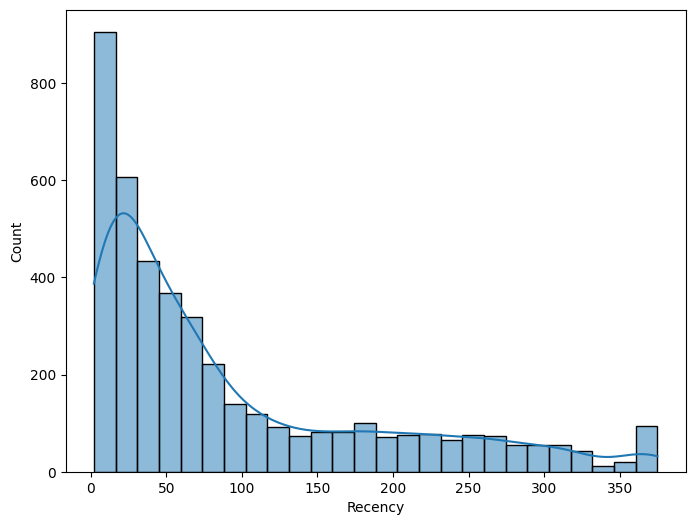

In [32]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=df_RFM, x=df_RFM.Recency, kde=True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


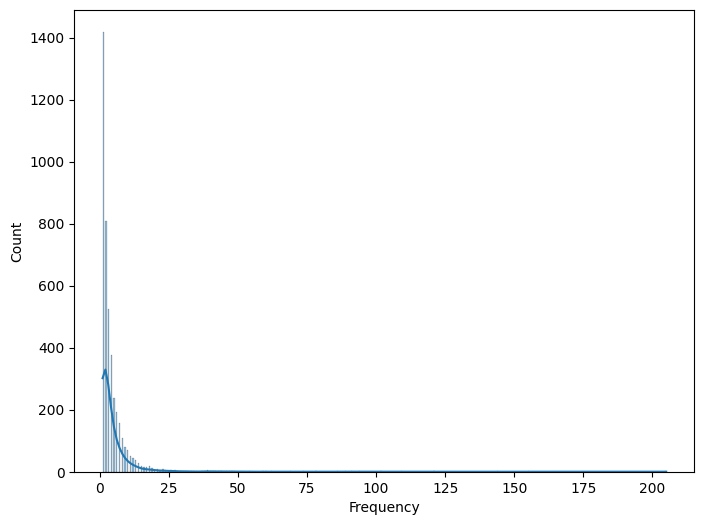

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=df_RFM, x=df_RFM.Frequency, kde=True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


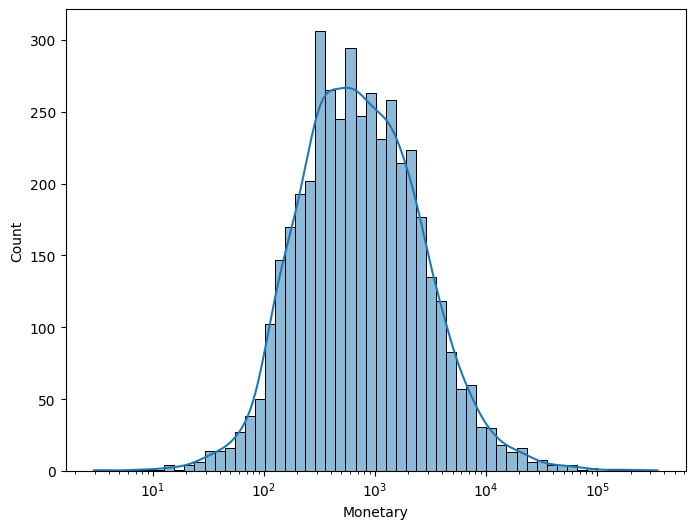

In [34]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=df_RFM, x=df_RFM.Monetary, kde=True, log_scale=True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


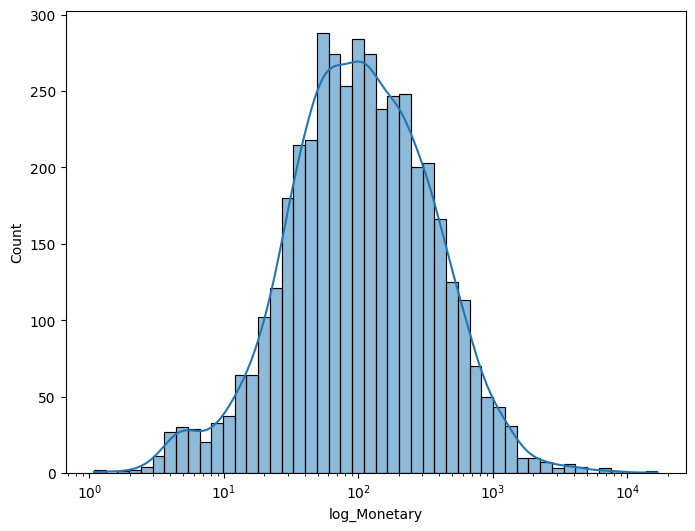

In [35]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=df_RFM, x=df_RFM.log_Monetary, kde=True, log_scale=True)
plt.show()

#### Notes:

- There is standard or correct method to define how many bins/buckets in `Recency`, `Frequency`, and `Monetary`. More important is to consider the business use and the business meaning.

- Most of the cases you would see is to divide each of them into 5 bins, meaning that putting `Recency`, `Frequency`, and `Monetary` together, there would be `5 x 5 x 5 = 125` different groups.

- It doesn't mean that all customers would be distributed to all `125` groups. Based on different method being adopted, size of groups can differ greatly.

    For example:
    
> Cut the `Recency`, `Frequency`, and `Monetary` in 5 quantiles (aka. quintiles). Every quantile will be having equal size of data. This method can guarantee data are even distributed in every group. However, the drawback is obvious as well -- same value data might be allocated in different group. Though 1 quantile apart might not bring substantial difference, long-tail or very skewed distribution would have separate same value data more than 1 quantile. It does not make sense.


#### Strategy

The following is the design of how to define the split and the thinking behind. It would set a cut-off for every dimension, to avoid the caveat abovementioned.

***`Recency`***

The more recent the transaction, the higher the `Recency` is. Because from the histogram, we can observe `Recency` is a positive skewed distribution, it spans from 0 day to more than 1 year. Dividing it by week / month would be a reasonable method.

> `5`: 0 - 14 days (within 2 weeks)

> `4`: 15 - 30 days (within 1 month)

> `3`: 31 - 90 days (within 3 months)

> `2`: 91 - 180 days (within 6 months)

> `1`: > 180 days (have not been doing transaction more than 6 months)

***`Frequency`***

The more the transaction, the higher the `Frequency` is. Because from the histogram, we know that `Frequency` is a positive skewed distribution; and from the `df_RFM.describe()`, the 75% percentile is still at 5. Also, consider the dataset products are mainly all-occasion gift-ware (dataset description), they are consumables but unlike food or many other consumables, which need to refill within a short period of time. It means most of the customers would not connect the company very frequently. With this pattern and the model of the retail business, we have to set the splitting carefully and practically.

> `5`: > 21 times 

> `4`: 11 - 20 times

> `3`: 5 - 10 times

> `2`: 3 - 4 times

> `1`: 1 - 2 times 

***`log-scaled Monetary`***
The more they spend, the higher the `Monetary` is. Because from the log-scaled histogram, it shows a nearly normally distribution. We can use standard deviation to define the splitting. From the `df_RFM.describe()`, the mean is $2,047, so the log-scaled mean is $218; the standard deviation is $8,912, the log-scaled standard deviation is $474.

> `5`: $(\mu + 3\sigma)$ to $+\infty$ : $(1640, +\infty)$

> `4`: $(\mu + 2\sigma)$ to $\mu + 3\sigma$ : $(1166, 1640]$

> `3`: $(\mu + \sigma)$ to $\mu + 2\sigma$ : $(692, 1166]$

> `2`: $\mu$ to $(\mu + \sigma)$ : $(218, 692]$

> `1`: $-\infty$ to $\mu$ : $(-\infty , 218]$

In [36]:
recency_bins = [0, 14, 30, 90, 180, df_RFM.Recency.max()+1]

recency_labels = [i for i in range(5,0,-1)]

df_RFM["Recency_score"] = pd.cut(df_RFM["Recency"], 
                                 labels=recency_labels,
                                 bins=recency_bins)

In [37]:
frequency_bins = [0, 2, 4, 10, 20, df_RFM.Frequency.max()+1]

frequency_labels = [i for i in range(1,6,1)]

df_RFM["Frequency_score"] = pd.cut(df_RFM["Frequency"], 
                                   labels=frequency_labels,
                                   bins=frequency_bins)

In [38]:
m_mean, m_sd = df_RFM.log_Monetary.mean(), df_RFM.log_Monetary.std()

log_monetary_bins = [df_RFM.log_Monetary.min()-1, 
                     m_mean, 
                     m_mean+m_sd, 
                     m_mean+2*m_sd, 
                     m_mean+3*m_sd, 
                     df_RFM.log_Monetary.max()+1]

log_monetary_labels = [i for i in range(1,6,1)]

df_RFM["log_Monetary_score"] = pd.cut(df_RFM["log_Monetary"], 
                                      labels=log_monetary_labels,
                                      bins=log_monetary_bins)

#### Comment:

`Monetary` values can vary widely among customers and may carry less meaning compared to other metrics. Thus, many RFM metrics would only consider `Recency` and `Frequency`. 

In [39]:
df_RFM["RFM_Score"] = df_RFM["Recency_score"].astype(str) + df_RFM["Frequency_score"].astype(str)

In [40]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}


In [41]:
df_RFM["Segment"] = df_RFM["RFM_Score"].replace(seg_map, regex=True)

In [42]:
df_RFM["Segment"]

0                   at_Risk
1             new_customers
2            about_to_sleep
3            about_to_sleep
4             new_customers
               ...         
4307    potential_loyalists
4308         about_to_sleep
4309            hibernating
4310            hibernating
4311    potential_loyalists
Name: Segment, Length: 4312, dtype: object

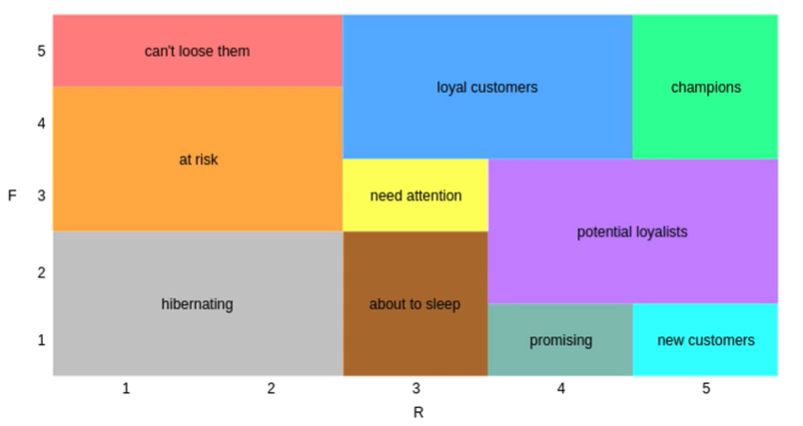
#### Explanations of Segments:

1. **Champions:** This segment represents loyal and high-value customers. Champions have made recent purchases (low Recency), shop frequently (high Frequency), and typically make high-value transactions (high Monetary). For marketers, this segment can be a focal point for increasing sales and retaining loyal customers.

2. **At Risk:** The At Risk segment includes customers who were previously active but have taken some time to make their most recent purchase. Their Recency is high, Frequency is moderate, and Monetary value is average. Re-engagement strategies can be applied to potentially retain these customers as they are at risk of being lost.

3. **Hibernating:** Hibernating represents customers who have remained inactive for an extended period, and their most recent purchases were made a long time ago. They have a very high Recency, low Frequency, and low Monetary value. Re-engagement strategies should be implemented for these customers as they have the potential to become active again.

4. **Loyal Customers:** This segment includes customers who shop frequently and tend to make high-value purchases. Recency is low, Frequency is high, and Monetary value is also high. These customers are loyal and valuable, making it important to maintain their satisfaction and loyalty.

5. **Cant Lose:** This segment consists of rare but high-value customers. Their Recency is low, Frequency is low, but their Monetary value is very high. While they may make fewer purchases, these contribute significantly. Efforts should be made to prevent losing these customers.

6. **Need Attention:** The Need Attention segment covers customers who were previously active but took some time to make their most recent purchases. Their Recency is moderate, Frequency is low, and Monetary value is at a moderate level. It's important to pay attention to and reactivate these customers.

7. **New Customers:** New Customers represent newly acquired customers. Their Recency is low, Frequency is low, and Monetary value is also low. Efforts should focus on acquiring and converting them into repeat customers.

8. **Potential Loyalists:** This segment includes customers who make infrequent purchases but have recently made a transaction. Recency is low, Frequency is moderate, and Monetary value is at a moderate level. These customers have the potential to become loyal.

9. **Promising:** Promising segment represents customers who made recent purchases but shop infrequently. Recency is low, Frequency is low, and Monetary value is low. Encouragement and strategies to increase their shopping activity are important.

10. **About to Sleep:** The About to Sleep segment comprises customers who made recent purchases but shop infrequently. Their Recency is low, Frequency is low, and Monetary value is low. Re-activating and encouraging them to shop more is essential as they are potentially at risk of being lost.

In [43]:
df_RFM.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].agg(['mean', 'count'])

Recency        Frequency            Monetary      
                           mean count       mean count          mean count
Segment                                                                   
about_to_sleep        56.854186  1063   2.109125  1063    852.237038  1063
at_Risk              148.727273    99   6.909091    99   2847.300909    99
cant_loose           153.333333     3  35.333333     3  17742.543333     3
champions              6.097087   206  25.898058   206  16230.713801   206
hibernating          213.482371  1333   1.634659  1333    562.553289  1333
loyal_customers       29.296610   118  15.389831   118   7486.162314   118
need_attention        53.565891   258   6.604651   258   2849.371050   258
new_customers          8.226667   150   1.526667   150    506.971267   150
potential_loyalists   14.066085   802   5.609726   802   2059.351461   802
promising             22.160714   280   1.496429   280    540.728071   280

#### Comment:

1. Champions: The Champions segment represents customers with a low average "Recency" value (6.10), a high "Frequency" value (25.90), and a significantly high "Monetary" value (16230.71) on average. Customers in this segment make frequent purchases and typically spend substantial amounts. This customer group consists of loyal and high-value customers. Marketing strategies can focus on retaining and increasing sales within this segment.

2. At Risk: The At Risk segment includes customers with a relatively high average "Recency" value (148.73), a moderate "Frequency" value (6.91), and an average "Monetary" value (2847.30). Customers in this segment may have the potential for repeat purchases, but their last purchase might have occurred some time ago. Customer retention and reactivation strategies can be applied to this group.

3. Hibernating: The Hibernating segment comprises customers with a very high average "Recency" value (213.48), low "Frequency" (1.63), and low "Monetary" value (562.55). These customers might not have shopped for an extended period, and their purchases may have lower values. Reactivation or re-engagement strategies can be considered for this segment.

## Customer Lift Time Value

* Time-Projected Probabilistic Lifetime Value Estimation

    * CLTV = (Customer Value / Churn Rate) * Profit Margin
    
    * Customer Value = Purchase Frequency * Average Order Value (The order is deliberately changed for a probabilistic interpretation.)

- In probabilistic terms:

    * CLTV = Conditional Expected Number of Transactions * Conditional Expected Average Profit

        * The Customer Value formula is equivalent to the Probabilistic CLTV:
            * Purchase Frequency = Conditional Expected Number of Transactions
            * Average Order Value = Conditional Expected Average Profit


- Conditional Expected Number of Transactions: We will model the purchasing behavior of the entire population with a probability distribution and then use this modeled behavior with conditional information, shaping the expected transaction numbers for each individual.

- Conditional Expected Average Profit: We will model the average profit value for the entire population as a probability distribution. Subsequently, using this model, we can conditionally, based on individual characteristics, calculate the expected average profits for each person. These expected profits will be derived in a way that is conditioned on the distribution of the main population.

- We will employ two models to perform these tasks:

    - CLTV = BG/NBD Model * Gamma Gamma Submodel

This approach allows us to make probabilistic forecasts for Customer Lifetime Value, incorporating statistical models to estimate expected transaction numbers and expected average profits on an individual basis.

### Expected Number of Transaction with BG/NBD

- The term "Expected" is used to express the expected value of a random variable.
- The expected value of a random variable is its average value.
- A random variable is a variable that takes its values from the outcomes of an experiment.
- In other words, when we assume that a variable follows a specific probability distribution, the expected value of that variable is, in fact, its average.
- The term "Conditional Expected" here usually refers to the idea that we will learn a distribution structure from a population. This distribution structure will represent the probability distribution of individuals' purchase or transaction behaviors, and by conditioning this expected value of the probability distribution, in other words, its average, we will shape it individually for each person. So, by conditioning the expected value of the probability distribution, we will be estimating the expected number of transactions for each individual.
- Instead of "Expected Number of Transaction," the term "Expected Sales for Casting" could have been used.

- BG/NBD stands for Beta Geometric/Negative Binomial Distribution.
- The BG/NBD model is used as a standalone sales forecasting model. It's often referred to as "Buy Till You Die" in the literature.
- The BG/NBD Model probabilistically models two processes for the Expected Number of Transactions:
    1. Transaction Process (Buy)
    2. Dropout Process (Till You Die) (Churn)
        - Transaction Process (Buy):
            - As long as a customer is "alive," the number of transactions they will make in a specific time period follows a Poisson distribution with a transaction rate parameter.
            - A customer will continue to make random purchases around their transaction rate as long as they are alive.
            - Transaction rates vary for each customer and follow a gamma distribution across the entire population (r, a).
            - This allows us to make inferences about a known population distribution using the variable.

        - Dropout Process (Till You Die):
            - Each customer has a dropout rate (dropout probability) with a probability of p.
            - After making a purchase, a customer may drop out with a certain probability.
            - Dropout rates vary for each customer and follow a beta distribution across the entire population (a, b).
            
Two important takeaways are that the Transaction Rate follows a gamma distribution, while the Dropout Rate follows a beta distribution.

1. **E(Y(t) | X = x, tx, T, r, a, a, b):**

    - **x:** The number of repeated purchases by a customer. It indicates that the customer has made at least a second purchase.
    - **tx:** Recency value, which represents the time elapsed between a customer's first purchase and their last purchase. This is calculated on a weekly basis and is unique for each customer.
    - **T:** Time, indicating the difference between the date of the first purchase by customers and the date when the analysis is conducted. It reflects the customer's "age" in weeks.
    - These first three values are specific to individual customers.
    - **X:** A random variable, meaning "X takes on the values after the equal sign."
    - **r, a:** Parameters of the gamma distribution.
    - **a, b:** Parameters of the beta distribution.
    - The Maximum Likelihood Estimation method is used to estimate the parameters of these two probability distributions, and it will be found using the functions we will use.
    - **Y(t):** This represents the expected number of transactions in a specific time period "t."
    - **E:** Expected value.

2. The resulting parameters, obtained through the prediction process, will shape the probabilistic nature of purchasing behavior in our dataset. In other words, these parameters will customize the gamma and beta distributions to best fit our audience.

These concepts and parameters play a crucial role in the development of probabilistic models that predict customer behavior and future transactions accurately.

### Gamma Gamma Submodel

1. **Transaction Profit Estimation:**

    - Used to estimate how much profit a customer can generate per transaction. This can be thought of as a prediction of the expected profit from the customer for each transaction or purchase.

2. **Probabilistic Version of Average Order Value:**

    - Average Order Value typically represents how much a customer spends on average per transaction. This is equivalent to the average transaction value.

3. **Probabilistic Nature of Customer Transaction Value:**

    - This implies that the transaction value (i.e., the monetary value of any purchase) for a customer is randomly distributed around an average value. For example, if a customer had 3 transactions and spent a total of 1200 USD, this definition suggests that this customer will continue to spend an average of 400 USD per transaction in the future, randomly.

4. **Average Transaction Value:**

    - It refers to the average amount spent per transaction. This indicates the expected amount that a customer will spend, on average, per transaction. This value follows a probability distribution known as a gamma distribution, which characterizes the distribution of this value across all customers.

- **E (M | p,q,y,mx,x):**
    - This represents the conditional expected value of monetary spending (M) based on certain conditions.
    - x: This represents the frequency value, indicating the number of repeated transactions, specifically customers who have made at least their second purchase.
    - mx: This symbolizes the observed transaction values.
    - When you input values for p, q, y, mx, and x on the right-hand side of the '|' symbol, it will provide the expected monetary value (E) under those specific conditions.

This concept is used to predict the expected monetary spending by a customer under certain circumstances, which are characterized by the given variables and conditions.

## CLTV Prediction with BG-NBD & Gamma Gamma

In [44]:
!pip install lifetimes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.4 MB/s eta 0:00:00


In [45]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions

from sklearn.preprocessing import MinMaxScaler

In [46]:
def outlier_thresholds(df, variable):
    
    quartile1 = df[variable].quantile(0.01)
    quartile3 = df[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    
    return low_limit, up_limit

In [47]:
def replace_with_thresholds(df, variable):
    low_limit, up_limit = outlier_thresholds(df, variable)
    df.loc[(df[variable] > up_limit), variable] = up_limit
    return df

In [48]:
df = (df.pipe(replace_with_thresholds, "Quantity")
        .pipe(replace_with_thresholds, 'Price')
     )

In [49]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
count,407664.000000,407664,407664.000000,407664.000000,407664.000000
mean,11.906525,2010-07-01 10:15:11.871688192,3.005620,15368.592598,21.664909
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,0.001000
25%,2.000000,2010-03-26 14:01:00,1.250000,13997.000000,4.950000
50%,5.000000,2010-07-09 15:47:00,1.950000,15321.000000,11.900000
75%,12.000000,2010-10-14 17:09:00,3.750000,16812.000000,19.500000
max,358.500000,2010-12-09 20:01:00,36.940000,18287.000000,15818.400000
std,28.725110,NaN,3.250568,1679.762138,77.150058


## Preparation of Lifetime Data Structure

### CLTV Prediction Metrics:

1. **Recency (Recency):**

    - This duration is measured in weeks and is personalized for each customer. It indicates the time between a customer's last purchase and their first purchase.

2. **T (Tenure - Customer's Age):**

    - T signifies the time between a customer's first purchase and the date of analysis.
    - This duration is also measured in weeks and is referred to as the customer's "age."

3. **Frequency (Frequency):**

    - Frequency indicates the total number of repeated purchases by a customer.
    - An important feature of this metric is that it represents customers who have made at least a second purchase, meaning the frequency is greater than 1.

4. **Monetary (Monetary):**

    - Monetary represents the average amount earned per transaction for a customer.
    - It is especially used by calculating the average value for each purchase transaction.

In [50]:
today_date

Timestamp('2010-12-11 20:01:00')

In [51]:
df_cltv = (df.groupby('Customer ID')
             .agg(Recency   = pd.NamedAgg(column="InvoiceDate", aggfunc= lambda x: (x.max() - x.min()).days),
                  T         = pd.NamedAgg(column="InvoiceDate", aggfunc= lambda x: (today_date - x.min()).days),
                  Frequency = pd.NamedAgg(column="Invoice"    , aggfunc= lambda x: x.nunique()),
                  Monetary  = pd.NamedAgg(column="TotalPrice" , aggfunc= lambda x: x.sum()))
             .assign(Monetary = lambda x: x.Monetary / x.Frequency)
          )
                
df_cltv

,Recency,T,Frequency,Monetary
Customer ID,,,,
12346.0,196,362,11,33.896364
12347.0,37,41,2,661.660000
12348.0,0,75,1,222.160000
12349.0,181,226,3,890.380000
12351.0,0,12,1,300.930000
...,...,...,...,...
18283.0,275,295,6,106.961667
18284.0,0,68,1,461.680000
18285.0,0,297,1,427.000000


In [52]:
df_cltv.describe()

,Recency,T,Frequency,Monetary
count,4312.000000,4312.000000,4312.000000,4312.000000
mean,133.998609,226.494434,4.455705,378.322627
std,132.827183,118.909291,8.170213,492.564076
min,0.000000,2.000000,1.000000,2.950000
25%,0.000000,118.000000,1.000000,182.087857
50%,105.000000,254.000000,2.000000,287.368056
75%,254.000000,330.000000,5.000000,423.576667
max,373.000000,375.000000,205.000000,11880.840000


In [53]:
df_cltv.shape

(4312, 4)

In [54]:
# To convert Recency and T from unit of day to week

df_cltv['Recency'] = df_cltv['Recency'] // 7
df_cltv['T'] = df_cltv['T'] // 7

#### Notes:

Why are T and Recency values calculated on a weekly basis?

T (tenure) and recency (the time since a customer's last purchase) values are often calculated on a weekly basis because it is a measure that allows for better analysis of transaction data and the prediction of customer behavior. Calculating them on a weekly basis helps capture seasonal fluctuations and other factors in transaction data more effectively.

Additionally, measuring in weekly units helps in better understanding and decision-making when it comes to transaction data because many transactions, especially in the retail sector, occur on a weekly cycle. Therefore, using weekly-based T and recency values for examining customer shopping behaviors enables businesses to improve customer relationship management and enhance marketing strategies more effectively.

In [55]:
# To exclude the frequency value equal to 1

df_cltv = df_cltv.loc[df_cltv.Frequency > 1]

#### Comment:

We consider the frequency value to be greater than 1 in CLTV (Customer Lifetime Value) prediction because it is used to focus on repeat customers who have made purchases more than once. Repeat customers, those with a frequency greater than 1, are more likely to make future purchases and are generally more valuable to a business. Customers who make a one-time purchase (frequency equals 1) often have lower potential for long-term profitability. Therefore, considering only repeat customers helps businesses create more effective marketing strategies and increase customer loyalty.

### Establishment of BG-NBD Model

In [56]:
BGF = BetaGeoFitter(penalizer_coef=0.01)
BGF.fit(frequency= df_cltv['Frequency'],
        recency= df_cltv['Recency'],
        T = df_cltv['T'])

<lifetimes.BetaGeoFitter: fitted with 2893 subjects, a: 0.08, alpha: 8.62, b: 1.25, r: 1.74>

In [57]:
# Estimate the number of purchases within next week

BGF.conditional_expected_number_of_purchases_up_to_time(t = 1,
                                                        frequency = df_cltv['Frequency'],
                                                        recency = df_cltv['Recency'],
                                                        T = df_cltv['T']).sort_values(ascending=False)

Customer ID
14911.0    3.351679e+00
12748.0    2.349847e+00
17850.0    2.334973e+00
15311.0    1.989369e+00
13089.0    1.788206e+00
               ...     
17067.0    3.098058e-04
17329.0    2.820997e-04
15359.0    9.763764e-06
17448.0    3.077800e-08
12482.0    9.476906e-11
Length: 2893, dtype: float64

In [58]:
df_cltv["expected_purchases_1_week"] = BGF.predict(t = 1,
                                                   frequency = df_cltv['Frequency'],
                                                   recency = df_cltv['Recency'],
                                                   T = df_cltv['T'])

In [59]:
df_cltv["expected_purchases_1_month"] = BGF.predict(t = 4,
                                                    frequency = df_cltv['Frequency'],
                                                    recency = df_cltv['Recency'],
                                                    T = df_cltv['T'])

In [60]:
df_cltv["expected_purchases_3_month"] = BGF.predict(t = 4*3,
                                                    frequency = df_cltv['Frequency'],
                                                    recency = df_cltv['Recency'],
                                                    T = df_cltv['T'])

In [61]:
df_cltv["expected_purchases_6_month"] = BGF.predict(t = 4*6,
                                                    frequency = df_cltv['Frequency'],
                                                    recency = df_cltv['Recency'],
                                                    T = df_cltv['T'])

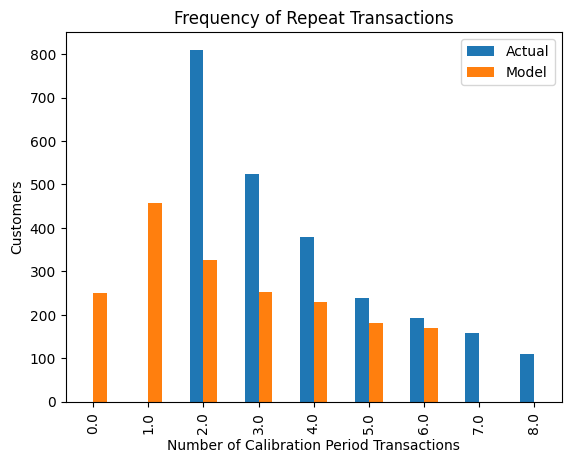

In [62]:
# Evaluation of prediction results
# This is to compare your data versus artificial data simulated with your fitted model’s parameters.

plot_period_transactions(BGF)
plt.show()

In [63]:
GGF = GammaGammaFitter(penalizer_coef=0.01)
GGF.fit(frequency=df_cltv["Frequency"], monetary_value=df_cltv['Monetary'])

<lifetimes.GammaGammaFitter: fitted with 2893 subjects, p: 3.79, q: 0.34, v: 3.72>

In [64]:
df_cltv["expected_average_profit"] = GGF.conditional_expected_average_profit(frequency=df_cltv["Frequency"], 
                                                                             monetary_value=df_cltv['Monetary'])

In [65]:
df_cltv["expected_average_profit"].sort_values(ascending=False)

Customer ID
17450.0    7681.447972
15760.0    7627.355279
13902.0    7067.119898
12357.0    6621.146066
14091.0    5223.948945
              ...     
15359.0      23.651222
17246.0      23.364833
14610.0      15.381350
16454.0      15.216969
18037.0      11.458474
Name: expected_average_profit, Length: 2893, dtype: float64

In [66]:
df_cltv

,Recency,T,Frequency,Monetary,expected_purchases_1_week,expected_purchases_1_month,expected_purchases_3_month,expected_purchases_6_month,expected_average_profit
Customer ID,,,,,,,,,
12346.0,28,51,11,33.896364,0.047863,0.191044,0.570091,1.132019,34.788047
12347.0,5,5,2,661.660000,0.264646,1.047445,3.074397,6.006881,727.138685
12349.0,25,32,3,890.380000,0.110160,0.439040,1.305618,2.582110,946.847479
12352.0,2,4,2,171.900000,0.277076,1.095856,3.212782,6.271677,190.420713
12356.0,6,8,3,1187.416667,0.272558,1.081204,3.185921,6.245172,1262.282629
...,...,...,...,...,...,...,...,...,...
18276.0,48,52,5,264.132000,0.108614,0.433461,1.292976,2.566182,274.482131
18277.0,13,18,4,267.417500,0.203067,0.808073,2.395333,4.721431,280.623835
18283.0,39,42,6,106.961667,0.149850,0.597808,1.781691,3.532575,110.813603


### Calculation of CLTV with BG-NBD and GG Model

In [67]:
cltv = GGF.customer_lifetime_value(BGF, 
                                   frequency = df_cltv['Frequency'],
                                   recency = df_cltv['Recency'],
                                   T = df_cltv['T'],
                                   monetary_value = df_cltv['Monetary'],
                                   time = 3, # 3 months
                                   freq = "W", # frequency information of T.
                                   discount_rate = 0.01)

In [68]:
cltv = cltv.reset_index()

In [69]:
df_cltv = df_cltv.merge(cltv, how='left', on="Customer ID")

In [70]:
df_cltv.sort_values("clv", ascending=False).head(10)

,Customer ID,Recency,T,Frequency,Monetary,expected_purchases_1_week,expected_purchases_1_month,expected_purchases_3_month,expected_purchases_6_month,expected_average_profit,clv
2827,18102.0,53,53,89,3923.194944,1.470391,5.870519,17.528369,34.830960,3930.965384,73333.485586
1096,14646.0,51,53,78,3184.570513,1.275590,5.092757,15.205961,30.215705,3191.778523,51654.453242
2499,17450.0,10,10,7,7488.900000,0.463494,1.841631,5.443225,10.699733,7681.447972,44454.019599
846,14156.0,52,53,102,1927.124902,1.675521,6.689521,19.973937,39.691017,1930.473129,41038.309157
1229,14911.0,53,53,205,742.183268,3.351679,13.381753,39.957148,79.403384,742.835483,31590.069107
616,13694.0,51,53,94,1398.331809,1.523035,6.080708,18.156019,36.078336,1400.979333,27071.613592
5,12357.0,0,3,2,6039.995000,0.289931,1.145752,3.354750,6.542492,6621.146066,23596.338614
2135,16754.0,38,39,29,2258.623103,0.641770,2.560710,7.635010,15.145547,2272.463146,18462.920761
2523,17511.0,52,53,31,2727.134516,0.528781,2.111043,6.302452,12.521833,2742.736145,18397.097645
2099,16684.0,50,52,27,2981.081852,0.470315,1.877554,5.604814,11.134365,3000.666431,17899.043517


#### Comment:
For example, customer ID: 14911 has made purchases at higher frequencies with lower prices (Monetary: 742.18).

How do these customers with such high Recency values promise the highest value?

According to the BG/NBD theory, for a customer who is regular for you, as the Recency value increases (user-specific, within itself), the likelihood of the customer making a purchase approaches. There was partial churn after each transaction. In other words, after each transaction, the urge to purchase is satisfied, the need is met, and there is a drop. Until the need to purchase re-emerges.

For example, let's consider Customer ID: 17450. Its Frequency is low, its Age (T) is low, but it promises very high potential as it ranks in the top 3.

It provides us with valuable information up to those with low profitability.

### Creating Segments Based on CLTV (Customer Lifetime Value)

In [71]:
df_cltv["Segment"] = pd.qcut(df_cltv["clv"], 4, labels=["D","C","B","A"])

In [72]:
df_cltv.sort_values("Segment", ascending=False)

,Customer ID,Recency,T,Frequency,Monetary,expected_purchases_1_week,expected_purchases_1_month,expected_purchases_3_month,expected_purchases_6_month,expected_average_profit,clv,Segment
2892,18287.0,26,29,4,586.427500,0.148115,0.590246,1.754911,3.469947,614.227488,1146.693942,A
1132,14708.0,12,13,3,361.970000,0.212540,0.844600,2.496771,4.908331,385.707707,1023.891306,A
2644,17732.0,16,17,8,270.802500,0.374458,1.490501,4.420770,8.719111,277.333704,1303.940457,A
1144,14733.0,4,5,4,1649.765000,0.408628,1.619069,4.761326,9.318217,1726.209161,8734.437236,A
1146,14735.0,49,53,24,257.269583,0.410077,1.637108,4.887280,9.709511,259.315280,1348.803002,A
...,...,...,...,...,...,...,...,...,...,...,...,...
1611,15714.0,14,27,3,151.310000,0.110162,0.438835,1.303647,2.575313,161.999403,224.646247,D
1612,15715.0,9,36,5,131.604000,0.017077,0.068097,0.202762,0.401577,137.147930,29.587371,D
1614,15717.0,24,32,4,114.175000,0.132654,0.528776,1.573050,3.112320,120.370998,201.443676,D
1620,15729.0,0,5,2,53.775000,0.229594,0.908714,2.667201,5.211285,60.969940,172.786770,D


In [73]:
df_cltv.groupby("Segment").agg(['count','mean','sum'])

Customer ID                           Recency                       T  \
              count          mean         sum   count       mean    sum count   
Segment                                                                         
D               724  15572.567680  11274539.0     724  22.091160  15994   724   
C               723  15411.983402  11142864.0     723  29.712310  21482   723   
B               723  15285.835408  11051659.0     723  29.744122  21505   723   
A               723  15132.695712  10940939.0     723  30.918396  22354   723   

                          Frequency  ... expected_purchases_3_month  \
              mean    sum     count  ...                        sum   
Segment                              ...                              
D        40.935083  29637       724  ...                 560.491328   
C        37.408022  27046       723  ...                1056.118156   
B        35.188105  25441       723  ...                1418.404701   
A        34.655602  25056       723  ...                2466.444926   

        expected_purchases_6_month                         \
                             count      mean          sum   
Segment                                                     
D                              724  1.532005  1109.171863   
C                              723  2.889247  2088.925876   
B                              723  3.877331  2803.310108   
A                              723  6.747952  4878.769074   

        expected_average_profit                              clv               \
                          count        mean            sum count         mean   
Segment                                                                         
D                           724  220.065746  159327.600118   724   145.976687   
C                           723  305.930911  221188.048782   723   393.375214   
B                           723  412.068938  297925.841995   723   704.985045   
A                           723  712.262334  514965.667534   723  2456.435215   

                       
                  sum  
Segment                
D        1.056871e+05  
C        2.844103e+05  
B        5.097042e+05  
A        1.776003e+06  

[4 rows x 33 columns]

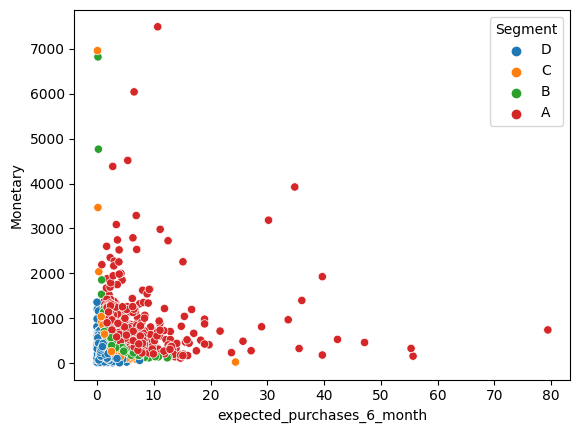

In [74]:
sns.scatterplot(df_cltv, x="expected_purchases_6_month", y="Monetary", hue="Segment")
plt.show()

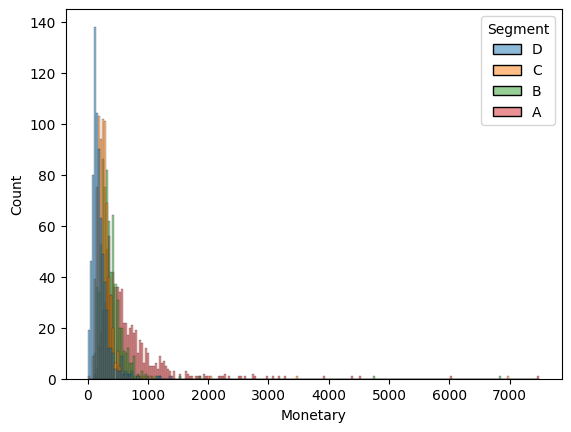

In [75]:
sns.histplot(df_cltv, x="Monetary", hue="Segment")
plt.show()

#### Analysis Results:
The results of CLTV and CLTV prediction represent the value of a customer to a business. However, this value is not expressed in terms of money. Instead, it represents the revenue that a customer brings to the business.

CLTV is used to determine the current or potential value of a customer. This value represents an estimated amount of the revenue a customer is expected to generate for the business. For example, a customer's CLTV value might be 500 units, indicating that the customer is expected to bring 500 units of revenue to the business.

CLTV prediction aims to forecast the future customer value. These predictions include an estimate of the revenue a customer is expected to bring in the future, based on their future purchasing habits, loyalty, and expected revenue generation. CLTV predictions are also revenue estimates, expressed in a specific currency or monetary amount.

In summary, CLTV and CLTV predictions are metrics that measure the revenue generated for a business, but they are not directly expressed as a specific amount of money.

----

#### CLTV

- CLTV calculation represents a single time period. It represents the time frame in which the analysis is conducted.
- Total Price is the dominant factor and overshadows the impact of purchase frequency.
- Once it has brought in the same revenue, the number of transactions is not significant.
- Churn Rate is revenue from the entire customer base, not individual, which is a drawback.
- Profit Margin is revenue from the entire customer base, not individual, which is a drawback.

----

- Segment A consists of high-value customers who make frequent purchases.

- Segment B also has good spending but slightly lower frequency.

- Segment C has moderate spending and frequency.

- Segment D represents customers with the lowest recency, frequency, and spending.

Consider tailoring marketing strategies based on these segments. For example:

- For Segment A, focus on retention and upselling.

- For Segment B, encourage repeat purchases.

- For Segment C, consider targeted promotions.

- For Segment D, re-engage with personalized offers.

Remember to validate these conclusions with additional analysis and domain knowledge specific to your business context. 